In [1]:
#Cargar Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [2]:
#Agregar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Cargar conjunto de datos
url="/content/drive/MyDrive/Colab Notebooks/Sales_outbound.xlsx"
data = pd.read_excel(url, header=0, na_values=" ?")

data

,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,1,NaN,51,FL,80000.0,12000.00,1,B,Email,05:30:00,1,4,0
1,2,NaN,40,CA,82579.0,12386.85,5,A,Phone,16:45:00,2,4,1
2,3,NaN,25,NY,58380.0,8757.00,3,C,Online Chat,06:30:00,4,5,1
3,4,NaN,57,IL,75000.0,11250.00,0,A,Email,05:30:00,3,2,0
4,5,NaN,61,CA,50049.0,7507.35,0,B,Email,09:00:00,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,NaN,29,TX,79812.0,11971.80,0,C,Online Chat,11:00:00,4,2,0
996,997,NaN,30,CA,80500.0,12075.00,3,A,Phone,15:00:00,5,1,1
997,998,NaN,42,NY,88643.0,13296.45,0,B,Phone,12:30:00,2,2,0
998,999,NaN,34,CA,74900.0,11235.00,1,A,Online Chat,12:30:00,5,3,0


In [4]:
#Tamaño del conjunto de datos
shape = data.shape
shape

(1000, 13)

In [5]:
#Tipo de los atributos
data. dtypes

,0
Client_ID,int64
Name,float64
Age,int64
Location,object
Income,float64
TAX,float64
previous sales_#,int64
Type_of_Products,object
Contact_Channel,object
Contact_hour,object


In [6]:
# Eliminar filas duplicadas
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data

,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,1,NaN,51,FL,80000.0,12000.00,1,B,Email,05:30:00,1,4,0
1,2,NaN,40,CA,82579.0,12386.85,5,A,Phone,16:45:00,2,4,1
2,3,NaN,25,NY,58380.0,8757.00,3,C,Online Chat,06:30:00,4,5,1
3,4,NaN,57,IL,75000.0,11250.00,0,A,Email,05:30:00,3,2,0
4,5,NaN,61,CA,50049.0,7507.35,0,B,Email,09:00:00,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,NaN,29,TX,79812.0,11971.80,0,C,Online Chat,11:00:00,4,2,0
996,997,NaN,30,CA,80500.0,12075.00,3,A,Phone,15:00:00,5,1,1
997,998,NaN,42,NY,88643.0,13296.45,0,B,Phone,12:30:00,2,2,0
998,999,NaN,34,CA,74900.0,11235.00,1,A,Online Chat,12:30:00,5,3,0


In [7]:
# Verificar si hay filas con datos faltantes
missing_rows = data.isnull().sum(axis=1)

# Filtrar filas con al menos un valor faltante
rows_with_missing = data[missing_rows > 0]

# Mostrar el número de valores faltantes por fila
rows_with_missing['Missing_Count'] = missing_rows[missing_rows > 0]
print(rows_with_missing['Missing_Count'].value_counts())
filtered_missing_data = rows_with_missing[rows_with_missing['Missing_Count'] != 1]
filtered_missing_data

Missing_Count
1    996
3      4
Name: count, dtype: int64


,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales,Missing_Count
142,143,NaN,49,TX,NaN,NaN,9,C,Phone,08:15:00,1,4,1,3
372,373,NaN,40,TX,NaN,NaN,0,A,Online Chat,05:30:00,1,3,0,3
519,520,NaN,48,FL,NaN,NaN,0,B,Phone,10:15:00,3,1,0,3
618,619,NaN,40,NY,NaN,NaN,3,C,Phone,07:30:00,1,5,1,3


In [8]:
#Elminar la colimna Client_ID y Name
data = data.drop(columns=['Client_ID'])
data = data.drop(columns=['Name'])
data

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,51,FL,80000.0,12000.00,1,B,Email,05:30:00,1,4,0
1,40,CA,82579.0,12386.85,5,A,Phone,16:45:00,2,4,1
2,25,NY,58380.0,8757.00,3,C,Online Chat,06:30:00,4,5,1
3,57,IL,75000.0,11250.00,0,A,Email,05:30:00,3,2,0
4,61,CA,50049.0,7507.35,0,B,Email,09:00:00,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
995,29,TX,79812.0,11971.80,0,C,Online Chat,11:00:00,4,2,0
996,30,CA,80500.0,12075.00,3,A,Phone,15:00:00,5,1,1
997,42,NY,88643.0,13296.45,0,B,Phone,12:30:00,2,2,0
998,34,CA,74900.0,11235.00,1,A,Online Chat,12:30:00,5,3,0


In [9]:
#Eliminar filas con datos faltantes
data = data.drop(index=142)
data = data.drop(index=372)
data = data.drop(index=519)
data = data.drop(index=618).reset_index(drop=True)  #Solo en el ultimo
data

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,51,FL,80000.0,12000.00,1,B,Email,05:30:00,1,4,0
1,40,CA,82579.0,12386.85,5,A,Phone,16:45:00,2,4,1
2,25,NY,58380.0,8757.00,3,C,Online Chat,06:30:00,4,5,1
3,57,IL,75000.0,11250.00,0,A,Email,05:30:00,3,2,0
4,61,CA,50049.0,7507.35,0,B,Email,09:00:00,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
991,29,TX,79812.0,11971.80,0,C,Online Chat,11:00:00,4,2,0
992,30,CA,80500.0,12075.00,3,A,Phone,15:00:00,5,1,1
993,42,NY,88643.0,13296.45,0,B,Phone,12:30:00,2,2,0
994,34,CA,74900.0,11235.00,1,A,Online Chat,12:30:00,5,3,0


In [10]:
#Medidas de centralidad y desviación para atributos numéricos
data.describe()

,Age,Income,TAX,previous sales_#,Num_Contacts,Satisfaction_Score,Sales
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,41.178715,63100.329317,9465.049398,2.048193,3.500000,2.555221,0.268072
std,12.279336,21638.692537,3245.803881,2.630262,2.399958,1.329965,0.443178
min,18.000000,5000.000000,750.000000,-7.000000,1.000000,1.000000,0.000000
25%,31.000000,46277.750000,6941.662500,0.000000,2.000000,1.000000,0.000000
50%,40.500000,62770.500000,9415.575000,1.000000,3.000000,2.000000,0.000000
75%,51.000000,80618.000000,12092.700000,4.000000,5.000000,3.000000,1.000000
max,125.000000,165355.000000,24803.250000,25.000000,33.000000,5.000000,1.000000


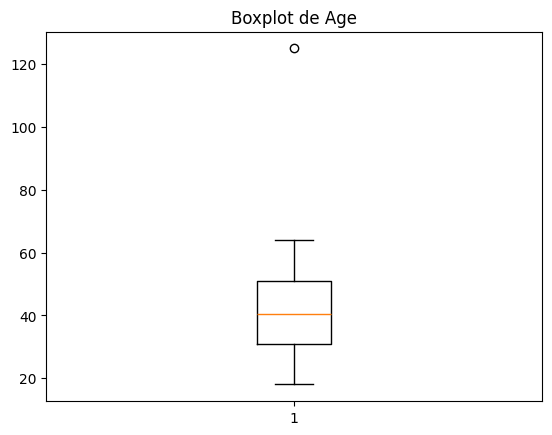

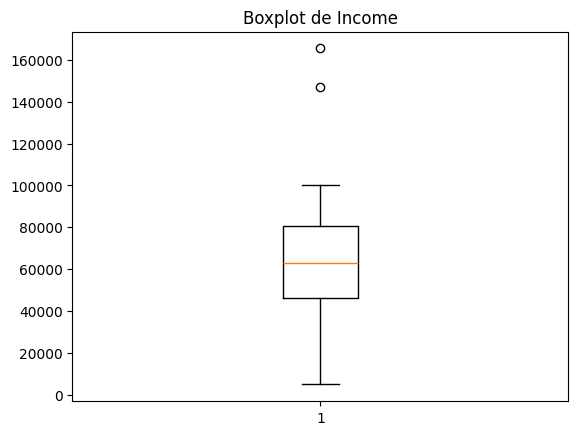

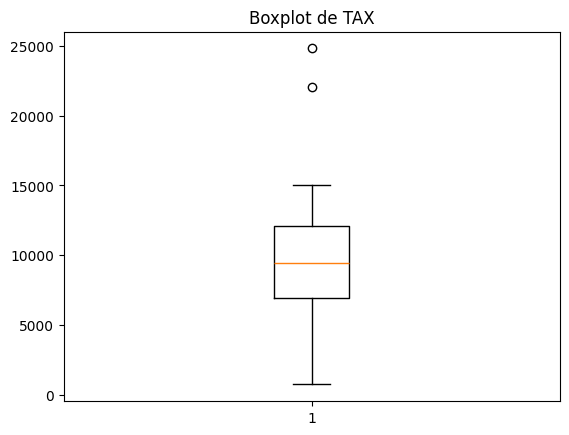

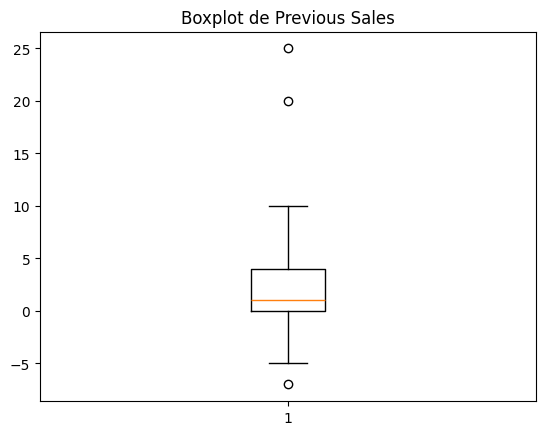

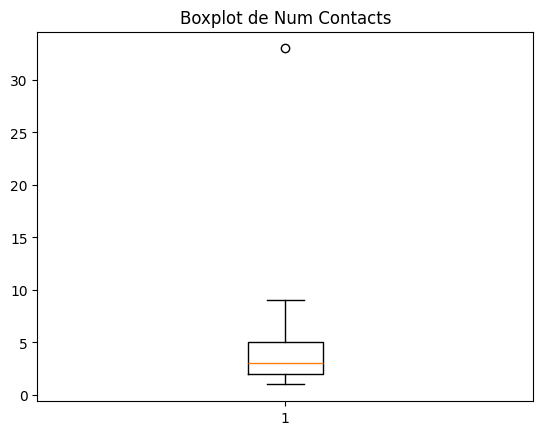

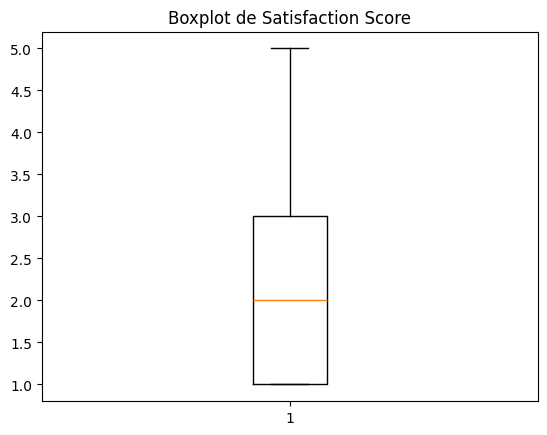

In [11]:
#En qué atributos hay datos atípicos?
plt.boxplot(data['Age'])
plt.title('Boxplot de Age')
plt.show()

plt.boxplot(data['Income'])
plt.title('Boxplot de Income')
plt.show()

plt.boxplot(data['TAX'])
plt.title('Boxplot de TAX')
plt.show()

plt.boxplot(data['previous sales_# '])
plt.title('Boxplot de Previous Sales')
plt.show()

plt.boxplot(data['Num_Contacts'])
plt.title('Boxplot de Num Contacts')
plt.show()

plt.boxplot(data['Satisfaction_Score'])
plt.title('Boxplot de Satisfaction Score')
plt.show()


In [12]:
#Analizar dato atipico - Eliminar
filtered_data = data[(data['Age'] == 125)]
filtered_data

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
12,125,FL,46309.0,6946.35,4,A,Phone,13:45:00,1,4,1


In [13]:
#Analizar dato atipico - Eliminar
filtered_data = data[(data['Income'] > 120000)]
filtered_data

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
242,43,CA,147014.0,22052.10,0,C,Phone,08:15:00,3,4,0
432,29,NY,165355.0,24803.25,1,B,Email,09:45:00,4,1,0


In [14]:
#Analizar dato atipico - Eliminar
filtered_data = data[(data['TAX'] > 20000)]
filtered_data

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
242,43,CA,147014.0,22052.10,0,C,Phone,08:15:00,3,4,0
432,29,NY,165355.0,24803.25,1,B,Email,09:45:00,4,1,0


In [15]:
#Analizar dato atipico - Mantener 210 y 450. Eliminar 919
filtered_data = data[(data['previous sales_# '] == -7) | (data['previous sales_# '] > 15)]
filtered_data

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
210,29,FL,78713.0,11806.95,20,C,Email,13:00:00,2,1,0
450,38,CA,85316.0,12797.40,25,C,Phone,07:30:00,1,4,1
919,25,FL,78781.0,11817.15,-7,B,Email,16:15:00,6,3,0


In [16]:
#Analizar dato atipico - Eliminar
filtered_data = data[(data['Num_Contacts'] > 20)]
filtered_data

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
294,47,FL,90963.0,13644.45,1,A,Email,05:30:00,33,3,0


In [17]:
#Eliminar datos atipicos
data = data.drop(index=12)
data = data.drop(index=242)
data = data.drop(index=432)
data = data.drop(index=919)
data = data.drop(index=294).reset_index(drop=True)  #Solo en el ultimo
data

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,51,FL,80000.0,12000.00,1,B,Email,05:30:00,1,4,0
1,40,CA,82579.0,12386.85,5,A,Phone,16:45:00,2,4,1
2,25,NY,58380.0,8757.00,3,C,Online Chat,06:30:00,4,5,1
3,57,IL,75000.0,11250.00,0,A,Email,05:30:00,3,2,0
4,61,CA,50049.0,7507.35,0,B,Email,09:00:00,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
986,29,TX,79812.0,11971.80,0,C,Online Chat,11:00:00,4,2,0
987,30,CA,80500.0,12075.00,3,A,Phone,15:00:00,5,1,1
988,42,NY,88643.0,13296.45,0,B,Phone,12:30:00,2,2,0
989,34,CA,74900.0,11235.00,1,A,Online Chat,12:30:00,5,3,0


Age
Adulto    499
Mayor     283
Joven     209
Name: count, dtype: int64


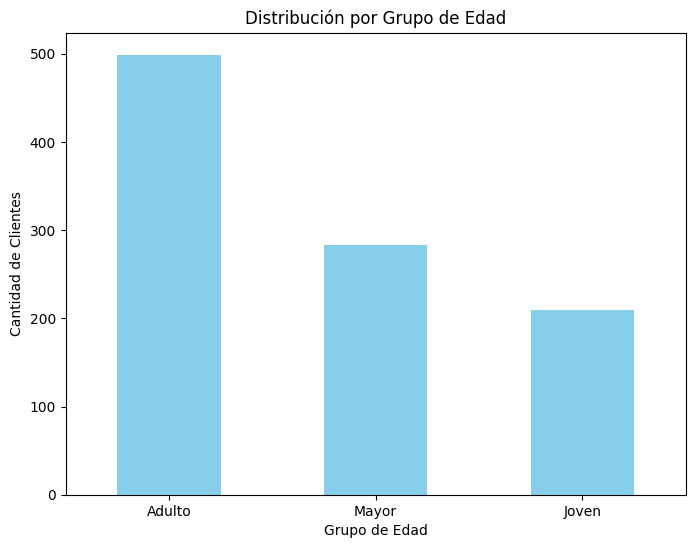

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,Mayor,FL,80000.0,12000.00,1,B,Email,05:30:00,1,4,0
1,Adulto,CA,82579.0,12386.85,5,A,Phone,16:45:00,2,4,1
2,Joven,NY,58380.0,8757.00,3,C,Online Chat,06:30:00,4,5,1
3,Mayor,IL,75000.0,11250.00,0,A,Email,05:30:00,3,2,0
4,Mayor,CA,50049.0,7507.35,0,B,Email,09:00:00,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
986,Joven,TX,79812.0,11971.80,0,C,Online Chat,11:00:00,4,2,0
987,Adulto,CA,80500.0,12075.00,3,A,Phone,15:00:00,5,1,1
988,Adulto,NY,88643.0,13296.45,0,B,Phone,12:30:00,2,2,0
989,Adulto,CA,74900.0,11235.00,1,A,Online Chat,12:30:00,5,3,0


In [18]:
#Agrupar Age
data['Age'] = pd.cut(data['Age'], bins=[18, 30, 50, 80], labels=['Joven', 'Adulto', 'Mayor'], right=False)
print(data['Age'].value_counts())

plt.figure(figsize=(8,6))
data['Age'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

data

Satisfaction_Score
Baja     561
Alta     244
Media    186
Name: count, dtype: int64


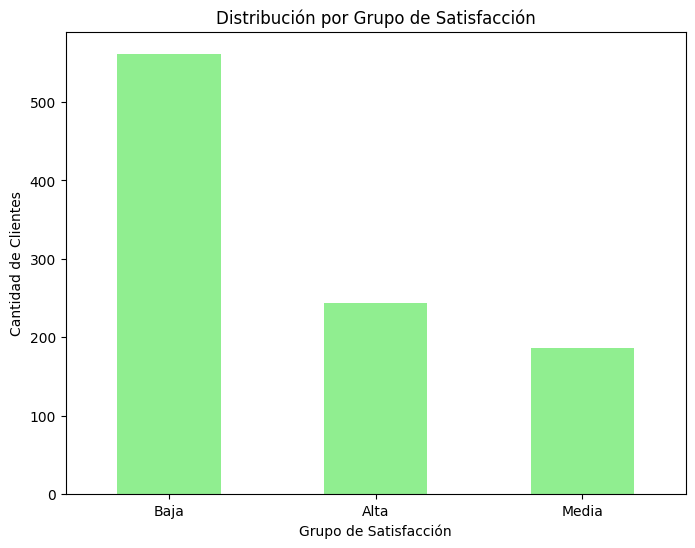

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,Mayor,FL,80000.0,12000.00,1,B,Email,05:30:00,1,Alta,0
1,Adulto,CA,82579.0,12386.85,5,A,Phone,16:45:00,2,Alta,1
2,Joven,NY,58380.0,8757.00,3,C,Online Chat,06:30:00,4,Alta,1
3,Mayor,IL,75000.0,11250.00,0,A,Email,05:30:00,3,Baja,0
4,Mayor,CA,50049.0,7507.35,0,B,Email,09:00:00,1,Alta,0
...,...,...,...,...,...,...,...,...,...,...,...
986,Joven,TX,79812.0,11971.80,0,C,Online Chat,11:00:00,4,Baja,0
987,Adulto,CA,80500.0,12075.00,3,A,Phone,15:00:00,5,Baja,1
988,Adulto,NY,88643.0,13296.45,0,B,Phone,12:30:00,2,Baja,0
989,Adulto,CA,74900.0,11235.00,1,A,Online Chat,12:30:00,5,Media,0


In [19]:
#Agrupar Satisfaction_Score
data['Satisfaction_Score'] = pd.cut(data['Satisfaction_Score'], bins=[0, 2, 3, 5], labels=['Baja', 'Media', 'Alta'], right=True)
print(data['Satisfaction_Score'].value_counts())

plt.figure(figsize=(8,6))
data['Satisfaction_Score'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribución por Grupo de Satisfacción')
plt.xlabel('Grupo de Satisfacción')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

data

Num_Contacts
Bajo     436
Medio    376
Alto     179
Name: count, dtype: int64


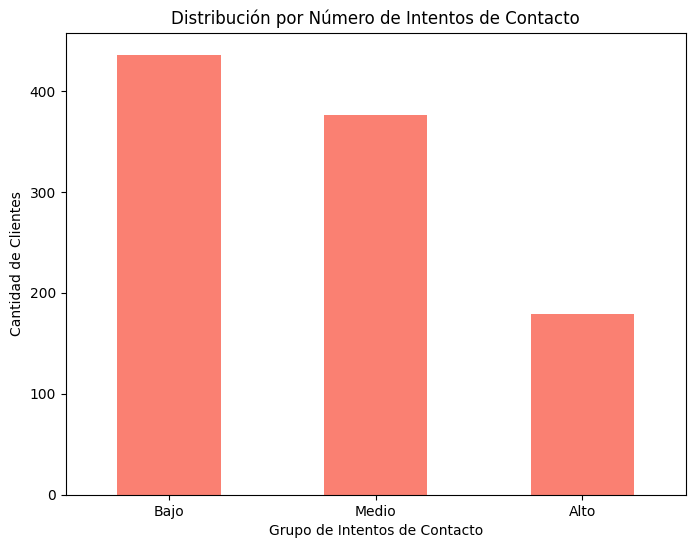

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,Mayor,FL,80000.0,12000.00,1,B,Email,05:30:00,Bajo,Alta,0
1,Adulto,CA,82579.0,12386.85,5,A,Phone,16:45:00,Bajo,Alta,1
2,Joven,NY,58380.0,8757.00,3,C,Online Chat,06:30:00,Medio,Alta,1
3,Mayor,IL,75000.0,11250.00,0,A,Email,05:30:00,Medio,Baja,0
4,Mayor,CA,50049.0,7507.35,0,B,Email,09:00:00,Bajo,Alta,0
...,...,...,...,...,...,...,...,...,...,...,...
986,Joven,TX,79812.0,11971.80,0,C,Online Chat,11:00:00,Medio,Baja,0
987,Adulto,CA,80500.0,12075.00,3,A,Phone,15:00:00,Medio,Baja,1
988,Adulto,NY,88643.0,13296.45,0,B,Phone,12:30:00,Bajo,Baja,0
989,Adulto,CA,74900.0,11235.00,1,A,Online Chat,12:30:00,Medio,Media,0


In [20]:
#Agrupar Num_Contacts
data['Num_Contacts'] = pd.cut(data['Num_Contacts'], bins=[0, 2, 5, 15], labels=['Bajo', 'Medio', 'Alto'], right=True)
print(data['Num_Contacts'].value_counts())

plt.figure(figsize=(8,6))
data['Num_Contacts'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribución por Número de Intentos de Contacto')
plt.xlabel('Grupo de Intentos de Contacto')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

data

Contact_hour
Mañana    438
Tarde     400
Noche     153
Name: count, dtype: int64


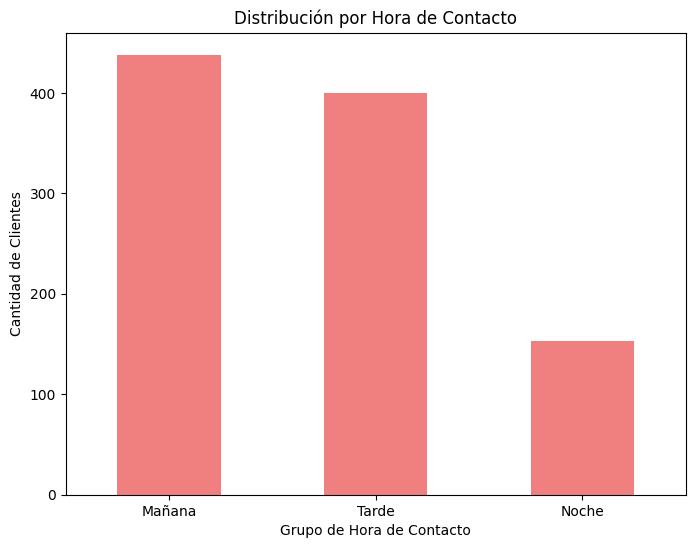

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,Mayor,FL,80000.0,12000.00,1,B,Email,Noche,Bajo,Alta,0
1,Adulto,CA,82579.0,12386.85,5,A,Phone,Tarde,Bajo,Alta,1
2,Joven,NY,58380.0,8757.00,3,C,Online Chat,Mañana,Medio,Alta,1
3,Mayor,IL,75000.0,11250.00,0,A,Email,Noche,Medio,Baja,0
4,Mayor,CA,50049.0,7507.35,0,B,Email,Mañana,Bajo,Alta,0
...,...,...,...,...,...,...,...,...,...,...,...
986,Joven,TX,79812.0,11971.80,0,C,Online Chat,Mañana,Medio,Baja,0
987,Adulto,CA,80500.0,12075.00,3,A,Phone,Tarde,Medio,Baja,1
988,Adulto,NY,88643.0,13296.45,0,B,Phone,Tarde,Bajo,Baja,0
989,Adulto,CA,74900.0,11235.00,1,A,Online Chat,Tarde,Medio,Media,0


In [21]:
# Agrupar Contact_hour
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Mañana'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noche'


data['Contact_hour'] = pd.to_datetime(data['Contact_hour'], format='%H:%M:%S').dt.hour
data['Contact_hour'] = data['Contact_hour'].apply(categorize_hour)
print(data['Contact_hour'].value_counts())

plt.figure(figsize=(8,6))
data['Contact_hour'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribución por Hora de Contacto')
plt.xlabel('Grupo de Hora de Contacto')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

data

Type_of_Products
C    364
A    328
B    299
Name: count, dtype: int64


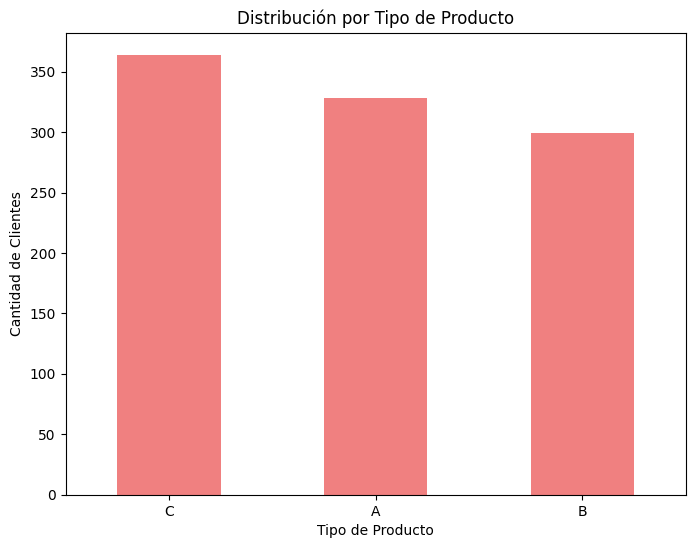

In [22]:
#Analisis de Type_of_Products
print(data['Type_of_Products'].value_counts())
plt.figure(figsize=(8,6))
data['Type_of_Products'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribución por Tipo de Producto')
plt.xlabel('Tipo de Producto')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

Contact_Channel
Phone          371
Email          327
Online Chat    293
Name: count, dtype: int64


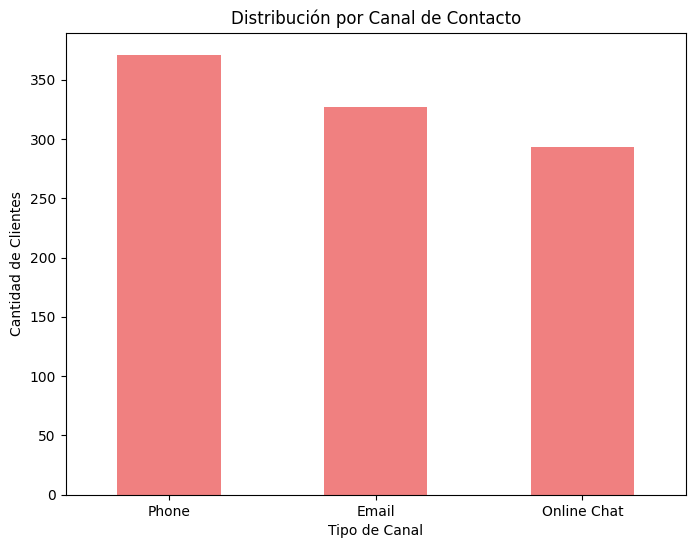

In [23]:
#Analisis de Contact_Channel
print(data['Contact_Channel'].value_counts())
plt.figure(figsize=(8,6))
data['Contact_Channel'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribución por Canal de Contacto')
plt.xlabel('Tipo de Canal')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

Location
FL    254
CA    212
NY    191
TX    185
IL    149
Name: count, dtype: int64


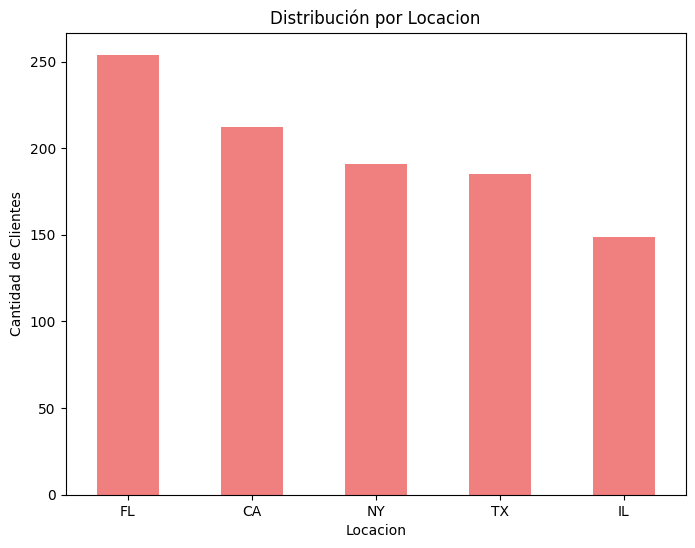

In [24]:
#Analisis de Location
print(data['Location'].value_counts())
plt.figure(figsize=(8,6))
data['Location'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribución por Locacion')
plt.xlabel('Locacion')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

In [25]:
#Normalizar variables numericas
data['Income'] = preprocessing.scale(data['Income'])
data['TAX'] = preprocessing.scale(data['TAX'])

In [26]:
#Convertir las variables categoricas a numericas con Label Encoding
label_encoder = LabelEncoder()
data['Age'] = label_encoder.fit_transform(data['Age'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Type_of_Products'] = label_encoder.fit_transform(data['Type_of_Products'])
data['Contact_Channel'] = label_encoder.fit_transform(data['Contact_Channel'])
data['Contact_hour'] = label_encoder.fit_transform(data['Contact_hour'])
data['Num_Contacts'] = label_encoder.fit_transform(data['Num_Contacts'])
data['Satisfaction_Score'] = label_encoder.fit_transform(data['Satisfaction_Score'])

In [27]:
data

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,2,1,0.805798,0.805798,1,1,0,1,1,0,0
1,0,0,0.927225,0.927225,5,0,2,2,1,0,1
2,1,3,-0.212130,-0.212130,3,2,1,0,2,0,1
3,2,2,0.570385,0.570385,0,0,0,1,2,1,0
4,2,0,-0.604376,-0.604376,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
986,1,4,0.796947,0.796947,0,2,1,0,2,1,0
987,0,0,0.829340,0.829340,3,0,2,2,2,1,1
988,0,3,1.212734,1.212734,0,1,2,2,1,1,0
989,0,0,0.565676,0.565676,1,0,1,2,2,2,0


In [28]:
data.drop('Sales', axis=1).corr()

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score
Age,1.000000,-0.024218,-0.024555,-0.024555,-0.035871,-0.052148,0.030187,0.026422,0.016141,-0.049367
Location,-0.024218,1.000000,-0.032803,-0.032803,-0.034304,-0.026885,-0.016706,0.020400,-0.044819,0.004474
Income,-0.024555,-0.032803,1.000000,1.000000,0.088326,-0.070559,0.049272,-0.033327,0.031209,0.007292
TAX,-0.024555,-0.032803,1.000000,1.000000,0.088326,-0.070559,0.049272,-0.033327,0.031209,0.007292
previous sales_#,-0.035871,-0.034304,0.088326,0.088326,1.000000,-0.014379,0.083884,0.001369,-0.000924,-0.159533
Type_of_Products,-0.052148,-0.026885,-0.070559,-0.070559,-0.014379,1.000000,0.019328,-0.040282,-0.018691,-0.077177
Contact_Channel,0.030187,-0.016706,0.049272,0.049272,0.083884,0.019328,1.000000,0.028421,0.003760,-0.057669
Contact_hour,0.026422,0.020400,-0.033327,-0.033327,0.001369,-0.040282,0.028421,1.000000,0.003888,0.013017
Num_Contacts,0.016141,-0.044819,0.031209,0.031209,-0.000924,-0.018691,0.003760,0.003888,1.000000,-0.126774
Satisfaction_Score,-0.049367,0.004474,0.007292,0.007292,-0.159533,-0.077177,-0.057669,0.013017,-0.126774,1.000000


In [29]:
#Eliminamos los mayores a 0.8, en este caso elimnamos TAX
data=data.drop('TAX', axis=1)
data

,Age,Location,Income,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,2,1,0.805798,1,1,0,1,1,0,0
1,0,0,0.927225,5,0,2,2,1,0,1
2,1,3,-0.212130,3,2,1,0,2,0,1
3,2,2,0.570385,0,0,0,1,2,1,0
4,2,0,-0.604376,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
986,1,4,0.796947,0,2,1,0,2,1,0
987,0,0,0.829340,3,0,2,2,2,1,1
988,0,3,1.212734,0,1,2,2,1,1,0
989,0,0,0.565676,1,0,1,2,2,2,0


In [30]:
#Identificamos el valor de cada clase de salida
# 1=SI  y  0=NO
print(data['Sales'].value_counts())

Sales
0    725
1    266
Name: count, dtype: int64


In [31]:
classes = list(data['Sales'].value_counts())
vals = [classes[0],classes[1]]
fig = px.pie(data,values=vals,names=["0","1"])
fig.show()

Iteracion:  1
Datos:
Sales
0    583
1    583
Name: count, dtype: int64
X_train_balanced: (1166, 9)
y_train_balanced: (1166,)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Mejores parametros:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


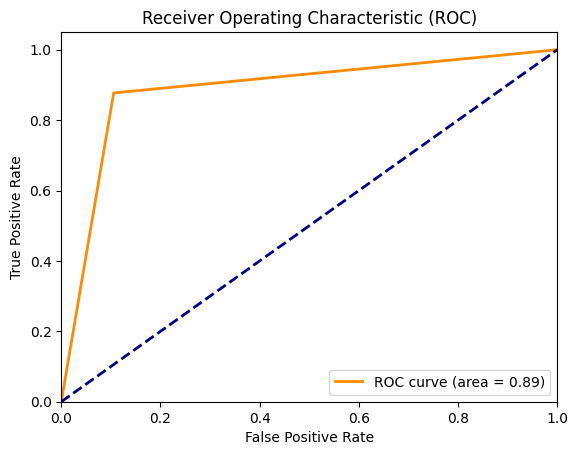

[[127  15]
 [  7  50]]
Accuracy:  0.8894472361809045
Precision:  [0.94776119 0.76923077]
Recall:     [0.8943662  0.87719298]
F1score:    [0.92028986 0.81967213]
AUC:  0.8857795898196196
Iteracion:  2
Datos:
Sales
1    581
0    581
Name: count, dtype: int64
X_train_balanced: (1162, 9)
y_train_balanced: (1162,)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Mejores parametros:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


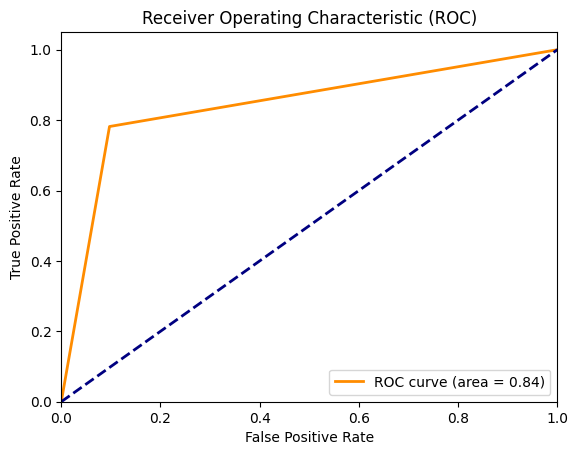

[[130  14]
 [ 12  43]]
Accuracy:  0.8693467336683417
Precision:  [0.91549296 0.75438596]
Recall:     [0.90277778 0.78181818]
F1score:    [0.90909091 0.76785714]
AUC:  0.8422979797979798
Iteracion:  3
Datos:
Sales
0    586
1    586
Name: count, dtype: int64
X_train_balanced: (1172, 9)
y_train_balanced: (1172,)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Mejores parametros:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


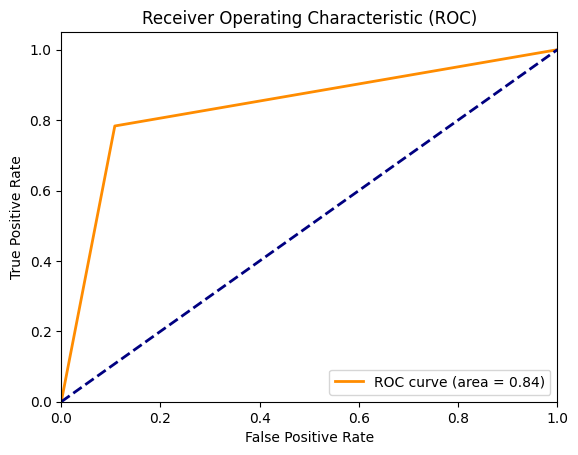

[[124  15]
 [ 13  47]]
Accuracy:  0.8592964824120602
Precision:  [0.90510949 0.75806452]
Recall:     [0.89208633 0.78333333]
F1score:    [0.89855072 0.7704918 ]
AUC:  0.8377098321342925
Iteracion:  4
Datos:
Sales
0    567
1    567
Name: count, dtype: int64
X_train_balanced: (1134, 9)
y_train_balanced: (1134,)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Mejores parametros:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


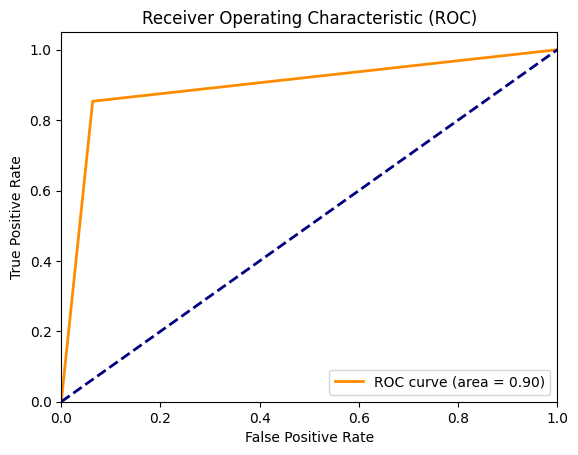

[[148  10]
 [  6  35]]
Accuracy:  0.9195979899497487
Precision:  [0.96103896 0.77777778]
Recall:     [0.93670886 0.85365854]
F1score:    [0.94871795 0.81395349]
AUC:  0.8951836986724298
Iteracion:  5
Datos:
Sales
0    575
1    575
Name: count, dtype: int64
X_train_balanced: (1150, 9)
y_train_balanced: (1150,)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Mejores parametros:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


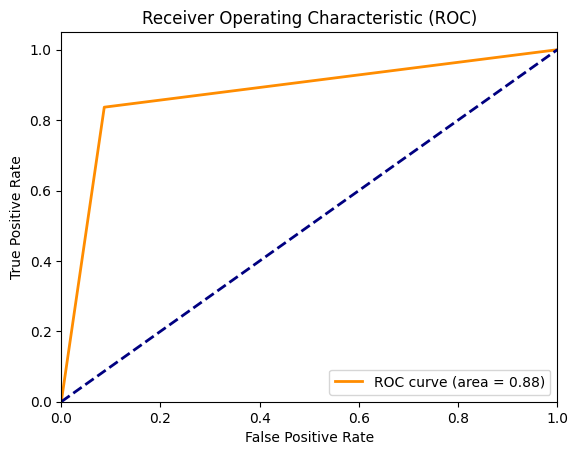

[[137  13]
 [  8  41]]
Accuracy:  0.8944723618090452
Precision:  [0.94482759 0.75925926]
Recall:     [0.91333333 0.83673469]
F1score:    [0.92881356 0.7961165 ]
AUC:  0.8750340136054422
Media
Accuracy:  0.88643216080402  |  Precision:  0.8492948475382402  |  Recall:  0.8672010228059527  |  F1score:  0.8573554067350871
Accuracy:  0.88643216080402  |  Precision:  0.8492948475382402  |  Recall:  0.8672010228059527  |  F1score:  0.8573554067350871
Accuracy:  0.88643216080402  |  Precision:  0.8492948475382402  |  Recall:  0.8672010228059527  |  F1score:  0.8573554067350871
Accuracy:  0.88643216080402  |  Precision:  0.8492948475382402  |  Recall:  0.8672010228059527  |  F1score:  0.8573554067350871
Accuracy:  0.88643216080402  |  Precision:  0.8492948475382402  |  Recall:  0.8672010228059527  |  F1score:  0.8573554067350871

Desviacion
Accuracy:  0.020985540721428247  |  Precision:  0.08704502334009921  |  Recall:  0.05011777591554174  |  F1score:  0.06663101873759118


In [32]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

HOLDOUT = 5

accuVec,precVec,recVec,f1Vec, rocVec=[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  X_train, X_test, y_train, y_test = train_test_split(data.drop(['Sales'],axis=1), data['Sales'], test_size=0.2)
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)
  print("Datos:")
  print(y_train.value_counts())
  print("X_train_balanced:", X_train.shape)
  print("y_train_balanced:", y_train.shape)

  rf = RandomForestClassifier()

  parameter_space = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
  }

  rf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=3, refit=True)

  rf.fit(X_train, y_train)

  print("Mejores parametros:")
  print(rf.best_params_)

  pred = rf.predict(X_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  fpr, tpr, thresholds = metrics.roc_curve(y_test,  pred_label, pos_label=1)
  roc_auc = metrics.auc(fpr, tpr)

  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  # Graficar la curva ROC ========================================
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()
  #===========================================================

  print(mat)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("AUC: ", roc_auc)
  print("=====================================")

print("Media")
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
Datos:
Sales
0    573
1    573
Name: count, dtype: int64
X_train_balanced: (1146, 9)
y_train_balanced: (1146,)


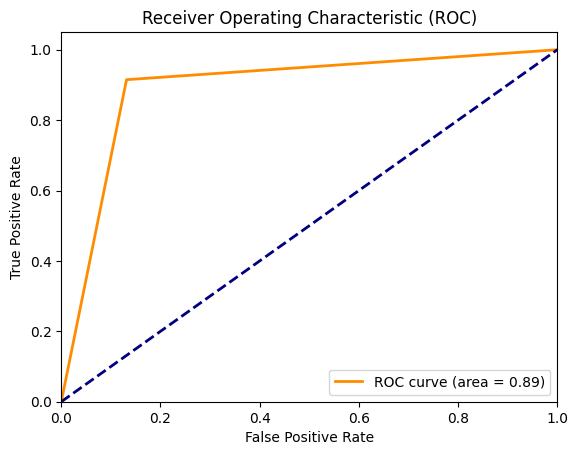

[[132  20]
 [  4  43]]
Accuracy:  0.8793969849246231
Precision:  [0.97058824 0.68253968]
Recall:     [0.86842105 0.91489362]
F1score:    [0.91666667 0.78181818]
AUC:  0.8916573348264277
Iteracion:  2
Datos:
Sales
0    567
1    567
Name: count, dtype: int64
X_train_balanced: (1134, 9)
y_train_balanced: (1134,)


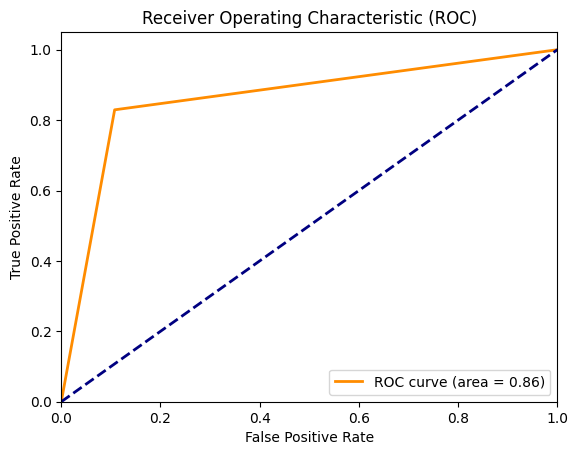

[[141  17]
 [  7  34]]
Accuracy:  0.8793969849246231
Precision:  [0.9527027  0.66666667]
Recall:     [0.89240506 0.82926829]
F1score:    [0.92156863 0.73913043]
AUC:  0.8608366779870329
Iteracion:  3
Datos:
Sales
0    584
1    584
Name: count, dtype: int64
X_train_balanced: (1168, 9)
y_train_balanced: (1168,)


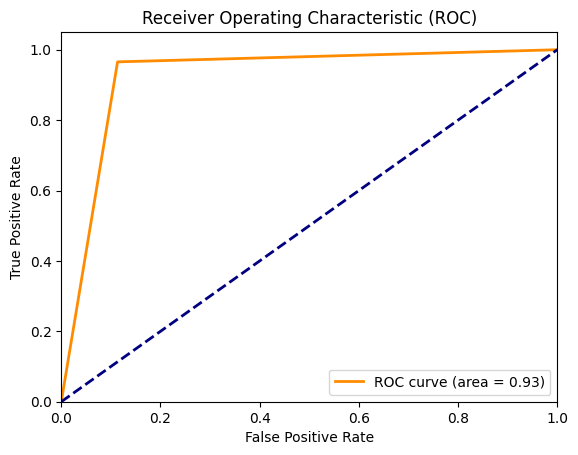

[[125  16]
 [  2  56]]
Accuracy:  0.9095477386934674
Precision:  [0.98425197 0.77777778]
Recall:     [0.88652482 0.96551724]
F1score:    [0.93283582 0.86153846]
AUC:  0.926021032037173
Iteracion:  4
Datos:
Sales
0    577
1    577
Name: count, dtype: int64
X_train_balanced: (1154, 9)
y_train_balanced: (1154,)


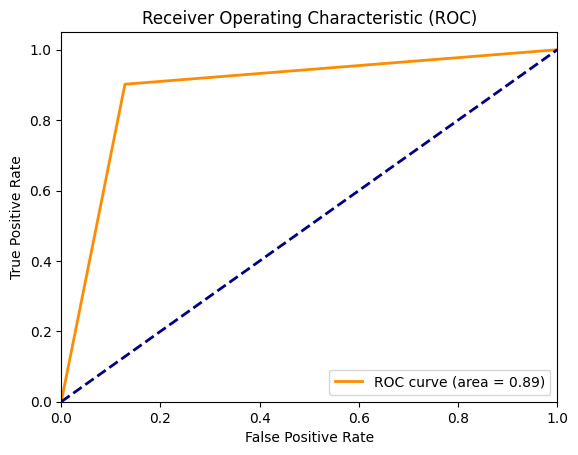

[[129  19]
 [  5  46]]
Accuracy:  0.8793969849246231
Precision:  [0.96268657 0.70769231]
Recall:     [0.87162162 0.90196078]
F1score:    [0.91489362 0.79310345]
AUC:  0.8867912029676734
Iteracion:  5
Datos:
Sales
0    576
1    576
Name: count, dtype: int64
X_train_balanced: (1152, 9)
y_train_balanced: (1152,)


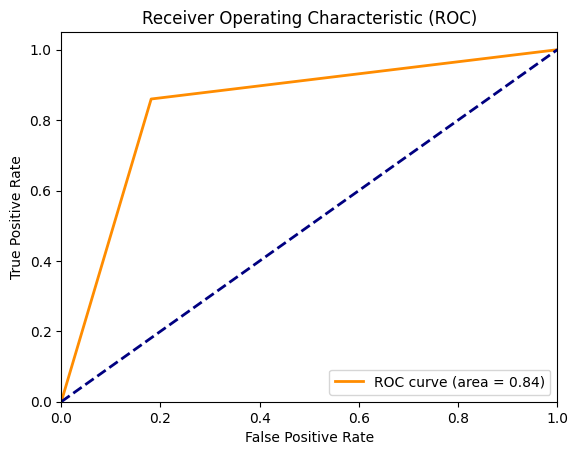

[[122  27]
 [  7  43]]
Accuracy:  0.8291457286432161
Precision:  [0.94573643 0.61428571]
Recall:     [0.81879195 0.86      ]
F1score:    [0.87769784 0.71666667]
AUC:  0.8393959731543623
Media
Accuracy:  0.8753768844221106  |  Precision:  0.8264928056735611  |  Recall:  0.880940444194534  |  F1score:  0.8455919766842845
Accuracy:  0.8753768844221106  |  Precision:  0.8264928056735611  |  Recall:  0.880940444194534  |  F1score:  0.8455919766842845
Accuracy:  0.8753768844221106  |  Precision:  0.8264928056735611  |  Recall:  0.880940444194534  |  F1score:  0.8455919766842845
Accuracy:  0.8753768844221106  |  Precision:  0.8264928056735611  |  Recall:  0.880940444194534  |  F1score:  0.8455919766842845
Accuracy:  0.8753768844221106  |  Precision:  0.8264928056735611  |  Recall:  0.880940444194534  |  F1score:  0.8455919766842845

Desviacion
Accuracy:  0.025897685882864577  |  Precision:  0.14217370581879737  |  Recall:  0.040156014361049784  |  F1score:  0.07700732670766886


In [33]:
import xgboost as xgb

HOLDOUT = 5

accuVec,precVec,recVec,f1Vec, rocVec=[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  X_train, X_test, y_train, y_test = train_test_split(data.drop(['Sales'],axis=1), data['Sales'], test_size=0.2)
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)
  print("Datos:")
  print(y_train.value_counts())
  print("X_train_balanced:", X_train.shape)
  print("y_train_balanced:", y_train.shape)

  params = {
    'objective': 'binary:logistic',  # función objetivo para la clasificación binaria
    'max_depth': 3,  # profundidad máxima del árbol
    'eta': 0.1,  # tasa de aprendizaje
    'gamma': 0.1,  # valor mínimo de pérdida necesaria para dividir un nodo
    'subsample': 0.8,  # fracción de observaciones a utilizar para cada árbol
    'colsample_bytree': 0.8  # fracción de características a utilizar para cada árbol
  }

  dtrain = xgb.DMatrix(X_train, label=y_train)
  dtest = xgb.DMatrix(X_test, label=y_test)

  num_rounds = 50  # número de rondas de entrenamiento
  model = xgb.train(params, dtrain, num_rounds)

  preds = model.predict(dtest)
  pred_label = [int(round(p)) for p in preds]

  mat=confusion_matrix(y_test, pred_label)

  fpr, tpr, thresholds = metrics.roc_curve(y_test,  pred_label, pos_label=1)
  roc_auc = metrics.auc(fpr, tpr)

  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  # Graficar la curva ROC ========================================
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()
  #===========================================================

  print(mat)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("AUC: ", roc_auc)
  print("=====================================")

print("Media")
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
Datos:
Sales
0    583
1    583
Name: count, dtype: int64
X_train_balanced: (1166, 9)
y_train_balanced: (1166,)
Epoch 1/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4860 - loss: 0.6907 - val_accuracy: 0.7136 - val_loss: 0.6719 - learning_rate: 1.0000e-04
Epoch 2/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6914 - loss: 0.6511 - val_accuracy: 0.7085 - val_loss: 0.6142 - learning_rate: 1.0000e-04
Epoch 3/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7128 - loss: 0.5835 - val_accuracy: 0.7487 - val_loss: 0.4778 - learning_rate: 1.0000e-04
Epoch 4/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7714 - loss: 0.4874 - val_accuracy: 0.7638 - val_loss: 0.4553 - learning_rate: 1.0000e-04
Epoch 5/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7969 - loss: 0.4384 - val_accuracy: 0.8141 - val_loss: 0.3931 - learning_rate: 1.0000e-04
Epoch 6/200
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8236 - loss: 0.4

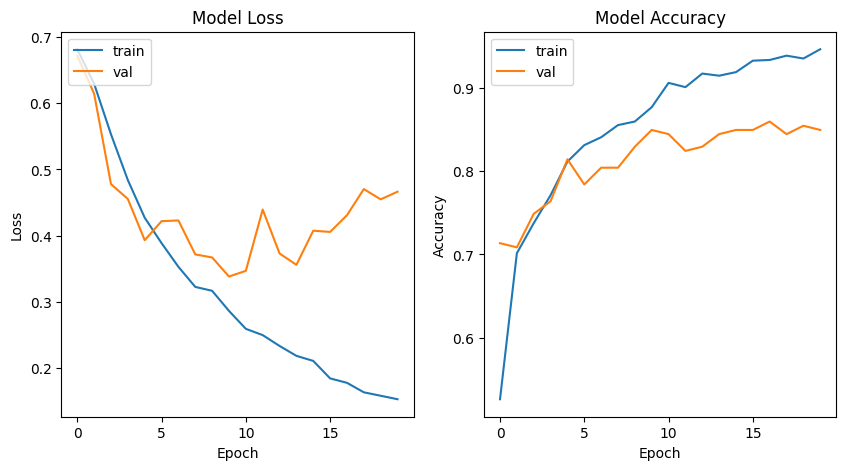

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


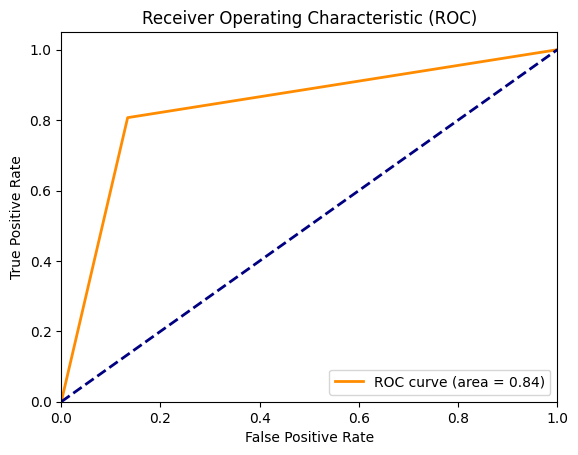

[[123  19]
 [ 11  46]]
Accuracy:  0.8492462311557789
Precision:  [0.91791045 0.70769231]
Recall:     [0.86619718 0.80701754]
F1score:    [0.89130435 0.75409836]
AUC:  0.8366073634791202
Iteracion:  2
Datos:
Sales
1    575
0    575
Name: count, dtype: int64
X_train_balanced: (1150, 9)
y_train_balanced: (1150,)
Epoch 1/200
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5516 - loss: 0.6880 - val_accuracy: 0.6784 - val_loss: 0.6705 - learning_rate: 1.0000e-04
Epoch 2/200
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7075 - loss: 0.6513 - val_accuracy: 0.7538 - val_loss: 0.5261 - learning_rate: 1.0000e-04
Epoch 3/200
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7687 - loss: 0.4961 - val_accuracy: 0.6834 - val_loss: 0.5604 - learning_rate: 1.0000e-04
Epoch 4/200
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7846 - loss: 0.4589 - val_accuracy: 0.7538 - val_loss: 0.4685 - learning_rate: 1.0000e-04
Epoch 5/200
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - 

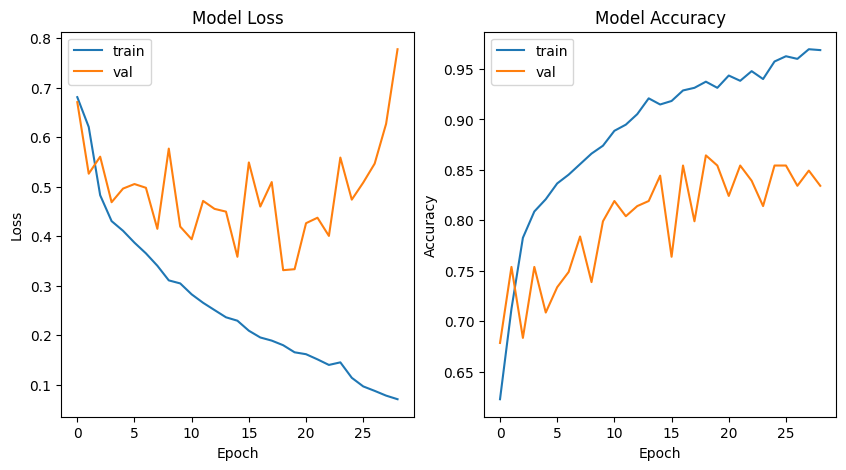

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


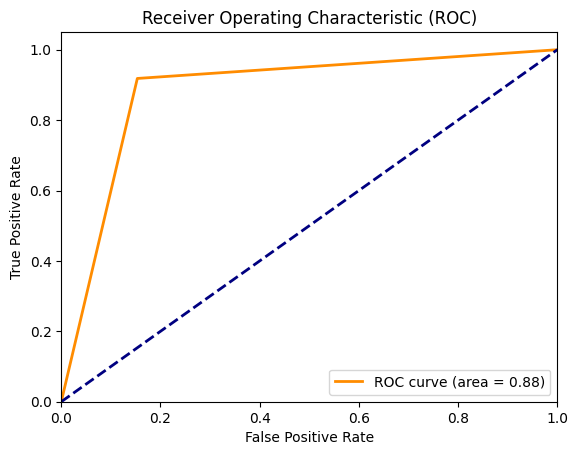

[[127  23]
 [  4  45]]
Accuracy:  0.864321608040201
Precision:  [0.96946565 0.66176471]
Recall:     [0.84666667 0.91836735]
F1score:    [0.90391459 0.76923077]
AUC:  0.882517006802721
Iteracion:  3
Datos:
Sales
0    586
1    586
Name: count, dtype: int64
X_train_balanced: (1172, 9)
y_train_balanced: (1172,)
Epoch 1/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6810 - loss: 0.6658 - val_accuracy: 0.7035 - val_loss: 0.6672 - learning_rate: 1.0000e-04
Epoch 2/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7046 - loss: 0.6536 - val_accuracy: 0.7387 - val_loss: 0.6398 - learning_rate: 1.0000e-04
Epoch 3/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7418 - loss: 0.5997 - val_accuracy: 0.8191 - val_loss: 0.4418 - learning_rate: 1.0000e-04
Epoch 4/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8053 - loss: 0.4491 - val_accuracy: 0.7889 - val_loss: 0.4994 - learning_rate: 1.0000e-04
Epoch 5/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - ac

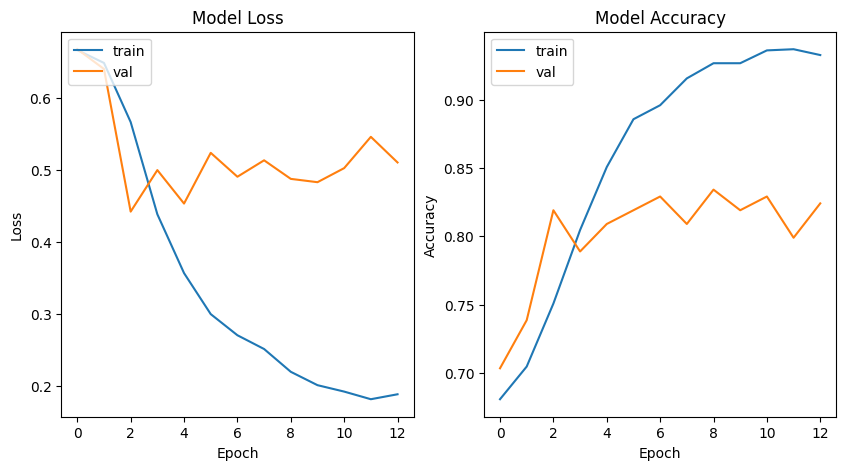

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


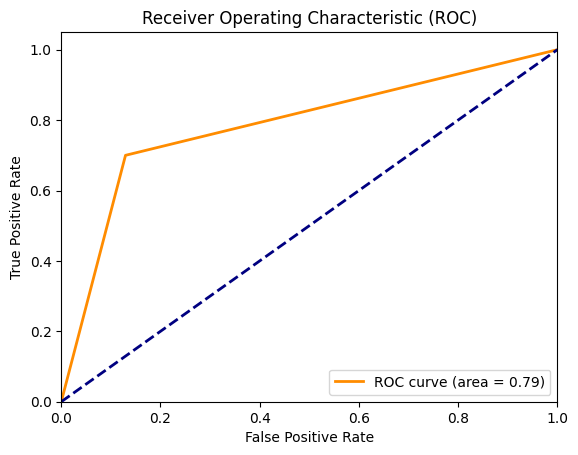

[[121  18]
 [ 18  42]]
Accuracy:  0.8190954773869347
Precision:  [0.8705036 0.7      ]
Recall:     [0.8705036 0.7      ]
F1score:    [0.8705036 0.7      ]
AUC:  0.7852517985611511
Iteracion:  4
Datos:
Sales
0    570
1    570
Name: count, dtype: int64
X_train_balanced: (1140, 9)
y_train_balanced: (1140,)
Epoch 1/200
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.3912 - loss: 0.7235 - val_accuracy: 0.5829 - val_loss: 0.6927 - learning_rate: 1.0000e-04
Epoch 2/200
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7071 - loss: 0.6190 - val_accuracy: 0.7437 - val_loss: 0.5670 - learning_rate: 1.0000e-04
Epoch 3/200
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7363 - loss: 0.5513 - val_accuracy: 0.7839 - val_loss: 0.5058 - learning_rate: 1.0000e-04
Epoch 4/200
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7758 - loss: 0.4964 - val_accuracy: 0.8241 - val_loss: 0.4037 - learning_rate: 1.0000e-04
Epoch 5/200
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accura

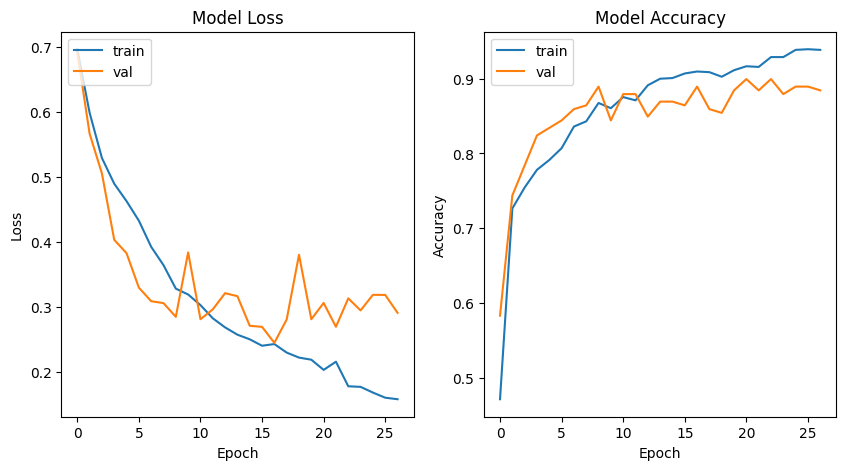

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


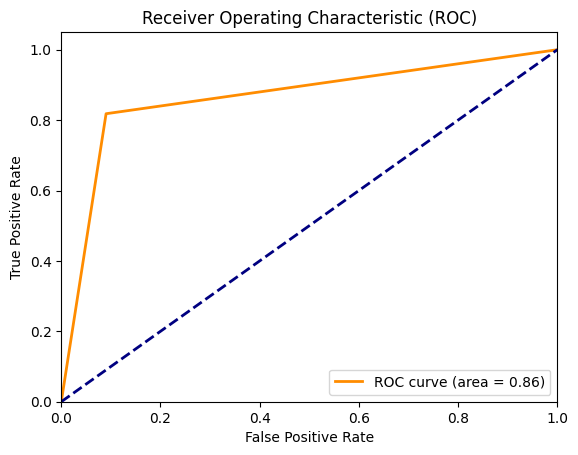

[[141  14]
 [  8  36]]
Accuracy:  0.8894472361809045
Precision:  [0.94630872 0.72      ]
Recall:     [0.90967742 0.81818182]
F1score:    [0.92763158 0.76595745]
AUC:  0.8639296187683285
Iteracion:  5
Datos:
Sales
0    576
1    576
Name: count, dtype: int64
X_train_balanced: (1152, 9)
y_train_balanced: (1152,)
Epoch 1/200
144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.5524 - loss: 0.6567 - val_accuracy: 0.6633 - val_loss: 0.6734 - learning_rate: 1.0000e-04
Epoch 2/200
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7605 - loss: 0.5850 - val_accuracy: 0.8492 - val_loss: 0.3777 - learning_rate: 1.0000e-04
Epoch 3/200
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8101 - loss: 0.4425 - val_accuracy: 0.8693 - val_loss: 0.3067 - learning_rate: 1.0000e-04
Epoch 4/200
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8155 - loss: 0.4118 - val_accuracy: 0.8744 - val_loss: 0.2791 - learning_rate: 1.0000e-04
Epoch 5/200
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - 

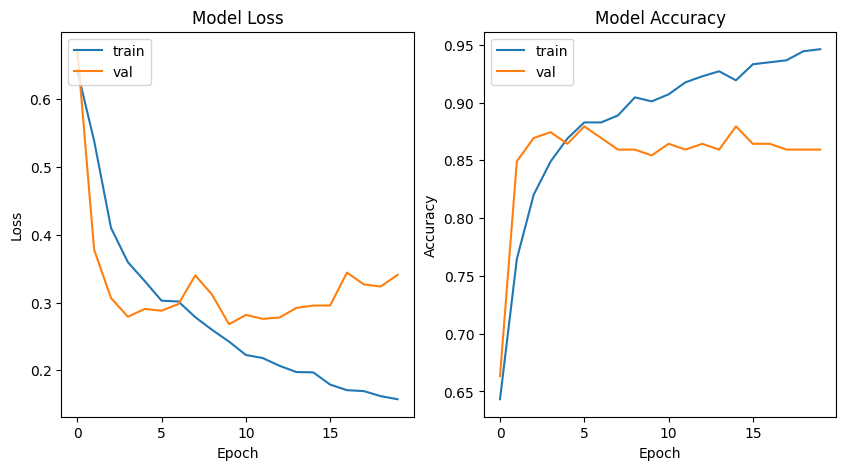

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


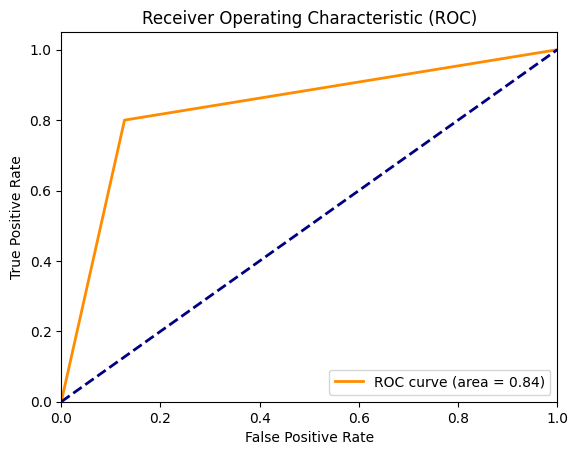

[[130  19]
 [ 10  40]]
Accuracy:  0.8542713567839196
Precision:  [0.92857143 0.6779661 ]
Recall:     [0.87248322 0.8       ]
F1score:    [0.89965398 0.73394495]
AUC:  0.836241610738255
Media
Accuracy:  0.8552763819095477  |  Precision:  0.8100182962411677  |  Recall:  0.8409094796699152  |  F1score:  0.8216239624705303
Accuracy:  0.8552763819095477  |  Precision:  0.8100182962411677  |  Recall:  0.8409094796699152  |  F1score:  0.8216239624705303
Accuracy:  0.8552763819095477  |  Precision:  0.8100182962411677  |  Recall:  0.8409094796699152  |  F1score:  0.8216239624705303
Accuracy:  0.8552763819095477  |  Precision:  0.8100182962411677  |  Recall:  0.8409094796699152  |  F1score:  0.8216239624705303
Accuracy:  0.8552763819095477  |  Precision:  0.8100182962411677  |  Recall:  0.8409094796699152  |  F1score:  0.8216239624705303

Desviacion
Accuracy:  0.022785495575386186  |  Precision:  0.11976953226339782  |  Recall:  0.06038903355246819  |  F1score:  0.08014120779740837


In [34]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Activation, Dropout, BatchNormalization, Conv1DTranspose, concatenate, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
import tensorflow as tf

HOLDOUT = 5

accuVec,precVec,recVec,f1Vec, rocVec=[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  X_train, X_test, y_train, y_test = train_test_split(data.drop(['Sales'],axis=1), data['Sales'], test_size=0.2)
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)
  print("Datos:")
  print(y_train.value_counts())
  print("X_train_balanced:", X_train.shape)
  print("y_train_balanced:", y_train.shape)

  image_in=Input((X_train.shape[1], 1))

  #contracting path
  conv1=Conv1D(8,3,activation='relu',padding='same')(image_in)
  conv1=Conv1D(8,3,activation='relu',padding='same')(conv1)
  maxp1=MaxPooling1D(1)(conv1)

  conv2=Conv1D(16,3,activation='relu',padding='same')(maxp1)
  conv2=Conv1D(16,3,activation='relu',padding='same')(conv2)
  maxp2=MaxPooling1D(1)(conv2)

  conv3=Conv1D(32,3,activation='relu',padding='same')(maxp2)
  conv3=Conv1D(32,3,activation='relu',padding='same')(conv3)
  maxp3=MaxPooling1D(1)(conv3)

  conv4=Conv1D(64,3,activation='relu',padding='same')(maxp3)
  conv4=Conv1D(64,3,activation='relu',padding='same')(conv4)
  maxp4=MaxPooling1D(pool_size=1)(conv4)

  conv5=Conv1D(128,3,activation='relu',padding='same')(maxp4)
  conv5=Conv1D(128,3,activation='relu',padding='same')(conv5)

  #expansive path
  up6=Conv1DTranspose(64,2,strides=1,padding='same')(conv5)
  up6=concatenate([up6,conv4])
  conv6=Conv1D(64,3,activation='relu',padding='same')(up6)
  conv6=Conv1D(64,3,activation='relu',padding='same')(conv6)

  up7=Conv1DTranspose(32,2,strides=1,padding='same')(conv6)
  up7=concatenate([up7,conv3])
  conv7=Conv1D(32,3,activation='relu',padding='same')(up7)
  conv7=Conv1D(32,3,activation='relu',padding='same')(conv7)

  up8=Conv1DTranspose(16,2,strides=1,padding='same')(conv7)
  up8=concatenate([up8,conv2])
  conv8=Conv1D(16,3,activation='relu',padding='same')(up8)
  conv8=Conv1D(16,3,activation='relu',padding='same')(conv8)

  up9=Conv1DTranspose(8,2,strides=1,padding='same')(conv8)
  up9=concatenate([up9,conv1],axis=1)
  conv9=Conv1D(8,3,activation='relu',padding='same')(up9)
  conv9=Conv1D(8,3,activation='relu',padding='same')(conv9)

  conv10 = Flatten()(conv9)
  outputs = Dense(2, activation='softmax')(conv10)

  model=Model(inputs=[image_in],outputs=[outputs])

  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  #model.summary()


  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=10,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Métrica a monitorear
    factor=0.5,          # Factor por el cual reducir la tasa de aprendizaje
    patience=5,          # Número de épocas sin mejora después de las cuales se reduce la tasa de aprendizaje
    min_lr=1e-7,         # Valor mínimo para la tasa de aprendizaje
    verbose=1            # Si es 1, imprime la información sobre la reducción
  )

  history = model.fit(X_train, to_categorical(y_train, 2), epochs=200,  batch_size=8, verbose=1,
                      validation_data=(X_test, to_categorical(y_test, 2)), callbacks=[callbackMed, reduce_lr])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  #model.evaluate(X_test)
  pred = model.predict(X_test)

  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]
  mat=confusion_matrix(y_test, pred_label)

  fpr, tpr, thresholds = metrics.roc_curve(y_test,  pred_label, pos_label=1)
  roc_auc = metrics.auc(fpr, tpr)

  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  # Graficar la curva ROC ========================================
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()
  #===========================================================

  print(mat)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("AUC: ", roc_auc)
  print("=====================================")

print("Media")
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

In [56]:
#Cargar y Transformar el otro conjunto de datos de test

#Cargar conjunto de datos
url2="/content/drive/MyDrive/Colab Notebooks/Sales_outbound_New.xlsx"
df2 = pd.read_excel(url2, header=0, na_values=" ?")

df2

,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score
0,1,NaN,51,FL,80000,12000.00,1,B,Email,05:30:00,1,4
1,2,NaN,40,CA,82579,12386.85,5,A,Phone,16:45:00,2,4
2,3,NaN,25,NY,58380,8757.00,3,C,Online Chat,06:30:00,4,5
3,4,NaN,57,IL,75000,11250.00,0,A,Email,05:30:00,3,2
4,5,NaN,61,CA,50049,7507.35,0,B,Email,09:00:00,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,NaN,48,IL,71235,10685.25,4,C,Phone,16:30:00,7,3
95,96,NaN,22,IL,65057,9758.55,2,A,Phone,05:30:00,1,3
96,97,NaN,40,FL,31239,4685.85,0,A,Email,05:30:00,2,1
97,98,NaN,31,NY,95661,14349.15,1,B,Email,05:30:00,2,5


In [57]:
data2 = df2.copy()
data2 = data2.drop(columns=['Client_ID'])
data2 = data2.drop(columns=['Name'])
data2 = data2.drop(columns=['TAX'])


data2['Age'] = pd.cut(data2['Age'], bins=[18, 30, 50, 200], labels=['Joven', 'Adulto', 'Mayor'], right=False)
data2['Satisfaction_Score'] = pd.cut(data2['Satisfaction_Score'], bins=[0, 2, 3, 5], labels=['Baja', 'Media', 'Alta'], right=True)
data2['Num_Contacts'] = pd.cut(data2['Num_Contacts'], bins=[0, 2, 5, 15], labels=['Bajo', 'Medio', 'Alto'], right=True)

def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Mañana'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noche'


data2['Contact_hour'] = pd.to_datetime(data2['Contact_hour'], format='%H:%M:%S').dt.hour
data2['Contact_hour'] = data2['Contact_hour'].apply(categorize_hour)

data2['Income'] = preprocessing.scale(data2['Income'])

label_encoder = LabelEncoder()
data2['Age'] = label_encoder.fit_transform(data2['Age'])
data2['Location'] = label_encoder.fit_transform(data2['Location'])
data2['Type_of_Products'] = label_encoder.fit_transform(data2['Type_of_Products'])
data2['Contact_Channel'] = label_encoder.fit_transform(data2['Contact_Channel'])
data2['Contact_hour'] = label_encoder.fit_transform(data2['Contact_hour'])
data2['Num_Contacts'] = label_encoder.fit_transform(data2['Num_Contacts'])
data2['Satisfaction_Score'] = label_encoder.fit_transform(data2['Satisfaction_Score'])

data2

,Age,Location,Income,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score
0,2,1,0.908235,1,1,0,1,1,0
1,0,0,1.030654,5,0,2,2,1,0
2,1,3,-0.118013,3,2,1,0,2,0
3,2,2,0.670898,0,0,0,1,2,1
4,2,0,-0.513465,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
94,0,2,0.492182,4,2,2,2,0,2
95,1,2,0.198928,2,0,2,1,1,2
96,0,1,-1.406330,0,0,0,1,1,1
97,0,3,1.651625,1,1,0,1,1,0


Iteracion:  1
Datos:
Sales
0    583
1    583
Name: count, dtype: int64
X_train_balanced: (1166, 9)
y_train_balanced: (1166,)


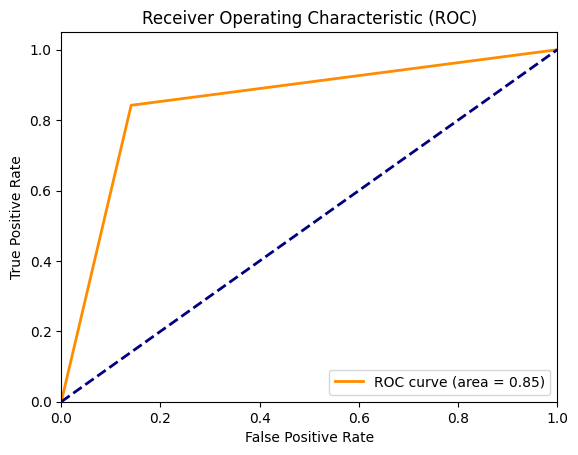

[[122  20]
 [  9  48]]
Accuracy:  0.8542713567839196
Precision:  [0.93129771 0.70588235]
Recall:     [0.85915493 0.84210526]
F1score:    [0.89377289 0.768     ]
AUC:  0.8506300963676797
Iteracion:  2
Datos:
Sales
0    577
1    577
Name: count, dtype: int64
X_train_balanced: (1154, 9)
y_train_balanced: (1154,)


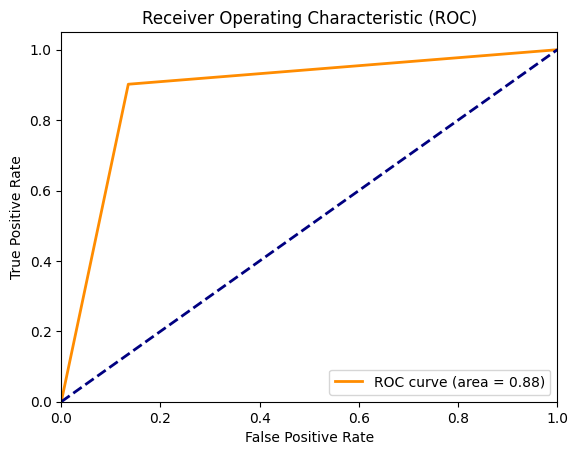

[[128  20]
 [  5  46]]
Accuracy:  0.8743718592964824
Precision:  [0.96240602 0.6969697 ]
Recall:     [0.86486486 0.90196078]
F1score:    [0.91103203 0.78632479]
AUC:  0.8834128245892952
Iteracion:  3
Datos:
Sales
0    578
1    578
Name: count, dtype: int64
X_train_balanced: (1156, 9)
y_train_balanced: (1156,)


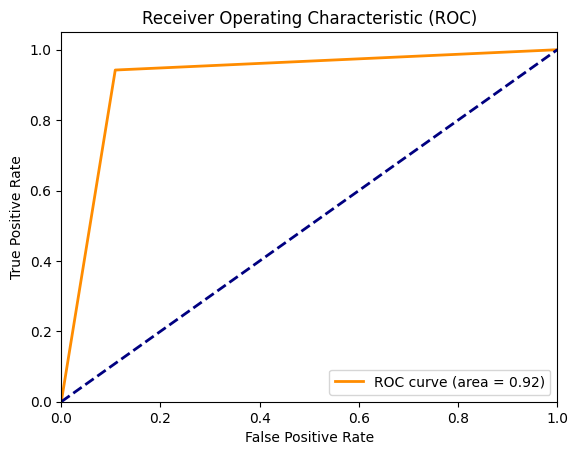

[[131  16]
 [  3  49]]
Accuracy:  0.9045226130653267
Precision:  [0.97761194 0.75384615]
Recall:     [0.89115646 0.94230769]
F1score:    [0.93238434 0.83760684]
AUC:  0.9167320774463632
Iteracion:  4
Datos:
Sales
0    584
1    584
Name: count, dtype: int64
X_train_balanced: (1168, 9)
y_train_balanced: (1168,)


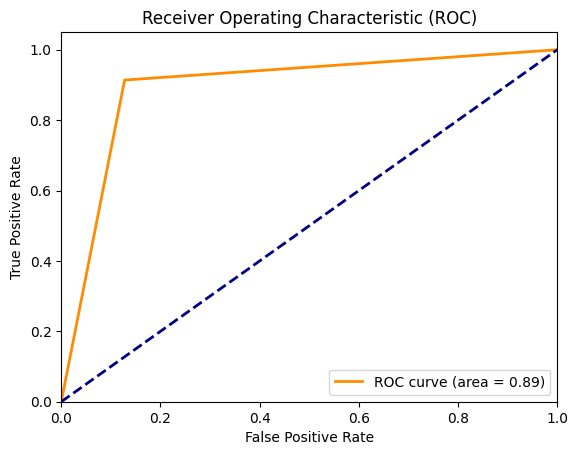

[[123  18]
 [  5  53]]
Accuracy:  0.8844221105527639
Precision:  [0.9609375  0.74647887]
Recall:     [0.87234043 0.9137931 ]
F1score:    [0.91449814 0.82170543]
AUC:  0.8930667644900954
Iteracion:  5
Datos:
Sales
1    586
0    586
Name: count, dtype: int64
X_train_balanced: (1172, 9)
y_train_balanced: (1172,)


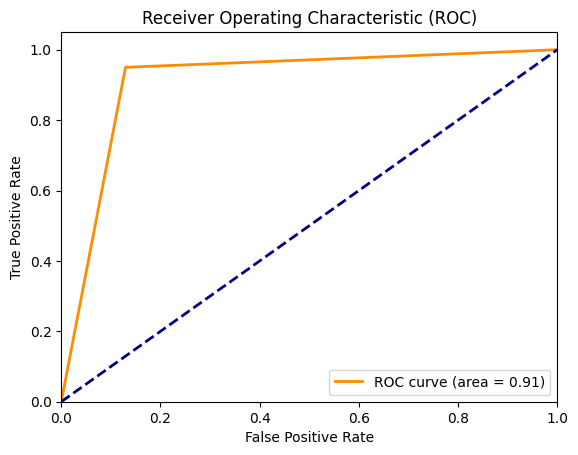

[[121  18]
 [  3  57]]
Accuracy:  0.8944723618090452
Precision:  [0.97580645 0.76      ]
Recall:     [0.8705036 0.95     ]
F1score:    [0.92015209 0.84444444]
AUC:  0.9102517985611511
Media
Accuracy:  0.8824120603015075  |  Precision:  0.8471236693869132  |  Recall:  0.8908187122909169  |  F1score:  0.8629920991131007
Accuracy:  0.8824120603015075  |  Precision:  0.8471236693869132  |  Recall:  0.8908187122909169  |  F1score:  0.8629920991131007
Accuracy:  0.8824120603015075  |  Precision:  0.8471236693869132  |  Recall:  0.8908187122909169  |  F1score:  0.8629920991131007
Accuracy:  0.8824120603015075  |  Precision:  0.8471236693869132  |  Recall:  0.8908187122909169  |  F1score:  0.8629920991131007
Accuracy:  0.8824120603015075  |  Precision:  0.8471236693869132  |  Recall:  0.8908187122909169  |  F1score:  0.8629920991131007

Desviacion
Accuracy:  0.017291106064407286  |  Precision:  0.11654666542342941  |  Recall:  0.03407193979741123  |  F1score:  0.05620062688396098


In [48]:
import xgboost as xgb

HOLDOUT = 5

accuVec,precVec,recVec,f1Vec, rocVec=[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)
  X_train, X_test, y_train, y_test = train_test_split(data.drop(['Sales'],axis=1), data['Sales'], test_size=0.2)
  smote = SMOTE()
  X_train, y_train = smote.fit_resample(X_train, y_train)
  print("Datos:")
  print(y_train.value_counts())
  print("X_train_balanced:", X_train.shape)
  print("y_train_balanced:", y_train.shape)

  params = {
    'objective': 'binary:logistic',  # función objetivo para la clasificación binaria
    'max_depth': 3,  # profundidad máxima del árbol
    'eta': 0.1,  # tasa de aprendizaje
    'gamma': 0.1,  # valor mínimo de pérdida necesaria para dividir un nodo
    'subsample': 0.8,  # fracción de observaciones a utilizar para cada árbol
    'colsample_bytree': 0.8  # fracción de características a utilizar para cada árbol
  }

  dtrain = xgb.DMatrix(X_train, label=y_train)
  dtest = xgb.DMatrix(X_test, label=y_test)

  num_rounds = 50  # número de rondas de entrenamiento
  model = xgb.train(params, dtrain, num_rounds)

  preds = model.predict(dtest)
  pred_label = [int(round(p)) for p in preds]

  mat=confusion_matrix(y_test, pred_label)

  fpr, tpr, thresholds = metrics.roc_curve(y_test,  pred_label, pos_label=1)
  roc_auc = metrics.auc(fpr, tpr)

  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))

  # Graficar la curva ROC ========================================
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()
  #===========================================================

  print(mat)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("AUC: ", roc_auc)
  print("=====================================")

print("Media")
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

In [60]:
dtest2 = xgb.DMatrix(data2)
preds = model.predict(dtest2)
pred_label = [int(round(p)) for p in preds]

In [61]:
pred_label

[1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1]

In [63]:
df2['Sales Predict IA'] = pred_label
df2

,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales Predict IA
0,1,NaN,51,FL,80000,12000.00,1,B,Email,05:30:00,1,4,1
1,2,NaN,40,CA,82579,12386.85,5,A,Phone,16:45:00,2,4,1
2,3,NaN,25,NY,58380,8757.00,3,C,Online Chat,06:30:00,4,5,1
3,4,NaN,57,IL,75000,11250.00,0,A,Email,05:30:00,3,2,0
4,5,NaN,61,CA,50049,7507.35,0,B,Email,09:00:00,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,NaN,48,IL,71235,10685.25,4,C,Phone,16:30:00,7,3,0
95,96,NaN,22,IL,65057,9758.55,2,A,Phone,05:30:00,1,3,1
96,97,NaN,40,FL,31239,4685.85,0,A,Email,05:30:00,2,1,0
97,98,NaN,31,NY,95661,14349.15,1,B,Email,05:30:00,2,5,0


In [64]:
df2.to_excel('df2_exportado.xlsx', index=False)